In [1]:
# imports
import os
import json

import pandas as pd
from matplotlib import pyplot as plt

from eagledb.scheme import BtaxInfo, GenomeInfo

/home/zhut/Projects/EAGLE/EAGLE_run_venv/local/lib/python2.7/site-packages/eagle/lib/general.py:82: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(string)


In [2]:
# constants
BACTDB_PATH = "../../EAGLEdb/bacteria"
BACTERIA_LIST_NAME = "bacteria.json"
BACTERIA_LIST_PATH = os.path.join(BACTDB_PATH, BACTERIA_LIST_NAME)
BTAX_JSON = "btax.json"
BTAX_JSON_PATH = os.path.join(BACTDB_PATH, BTAX_JSON)

In [9]:
# create bactdb_repr
bactdb_repr_path = BACTDB_PATH + "_repr"
if not os.path.exists(bactdb_repr_path):
    os.makedirs(bactdb_repr_path)

with open(BACTERIA_LIST_PATH) as bacteria_list_f:
    bacteria_list = json.load(bacteria_list_f)
repr_bacteria_list = list()
for genome_info in bacteria_list:
    if genome_info["is_repr"]:
        repr_bacteria_list.append(genome_info)
print("number of representative bacterial genomes: %s" % len(repr_bacteria_list))
with open(os.path.join(bactdb_repr_path, BACTERIA_LIST_NAME), "w") as repr_bacteria_list_f:
    json.dump(repr_bacteria_list, repr_bacteria_list_f, indent=2)

number of representative bacterial genomes: 1211


In [61]:
# create bactdb_sub
sub_name = "_ecoli"

bactdb_sub_path = BACTDB_PATH + sub_name
if not os.path.exists(bactdb_sub_path):
    os.makedirs(bactdb_sub_path)

with open(BACTERIA_LIST_PATH) as bacteria_list_f:
    bacteria_list = json.load(bacteria_list_f)
sub_bacteria_list = list()
for genome_info in bacteria_list:
    if "escherichia_coli" in genome_info["org_name"].lower():
        sub_bacteria_list.append(genome_info)
print("number of E. coli genomes: %s" % len(sub_bacteria_list))
with open(os.path.join(bactdb_sub_path, BACTERIA_LIST_NAME), "w") as sub_bacteria_list_f:
    json.dump(sub_bacteria_list, sub_bacteria_list_f, indent=2)

number of E. coli genomes: 575


In [3]:
# get btax statistics
with open(BTAX_JSON_PATH) as btax_json_f:
    btax_dict = json.load(btax_json_f)
    
n_batx = len(btax_dict)
n_orders = 0
fams = set()
genera = set()
species = set()
n_genomes = 0
btax_stats_list = list()
for btax_name in btax_dict:
    btax_info = BtaxInfo.load_from_dict(btax_dict[btax_name])
    btax_stats_dict = {"n_genomes": 0, 
                       "n_orders": len(btax_info.name.split(",")), 
                       "median_dist": btax_info.median_d, 
                       "mean_dist": btax_info.mean_d}
    n_orders += btax_stats_dict["n_orders"]
    genomes = set()
    for genome_dict in btax_info.genomes:
        genome_info = GenomeInfo.load_from_dict(genome_dict)
        genomes.add(genome_info.org_name)
        species.add(genome_info.taxonomy[-1])
        genera.add(genome_info.taxonomy[-2])
        try:
            fams.add(genome_info.taxonomy[-3])
        except IndexError:
            print(genome_info.taxonomy)
    
    btax_stats_dict["n_genomes"] = len(genomes)
    n_genomes += btax_stats_dict["n_genomes"]
    btax_stats_list.append(btax_stats_dict)
btax_stats_df = pd.DataFrame(btax_stats_list, index=list(btax_dict.keys()))

print("base taxons number - %s" % n_batx)
print("orders number - %s" % n_orders)
print("families number - %s" % len(fams))
print("genera number - %s" % len(genera))
print("species number - %s" % len(species))
print("genomes number - %s" % n_genomes)

[u'Bacteria', u'Candidatus_Saccharibacteria']
[u'Bacteria', u'Candidatus_Wolfebacteria']
[u'Bacteria', u'Candidatus_Beckwithbacteria']
[u'Bacteria', u'Candidatus_Saccharibacteria']
[u'Bacteria', u'Candidatus_Woesebacteria']
[u'Bacteria', u'Candidatus_Campbellbacteria']
[u'Bacteria', u'Candidatus_Gracilibacteria']
[u'Bacteria', u'Candidatus_Saccharibacteria']
base taxons number - 54
orders number - 174
families number - 304
genera number - 671
species number - 1401
genomes number - 1977


In [4]:
btax_stats_df

,mean_dist,median_dist,n_genomes,n_orders
Pseudomonadales_related,0.078144,0.087254,73,3
Rickettsiales,0.133791,0.183771,30,1
Anaerolineales_related,0.134102,0.111321,21,5
Thermales_related,0.165137,0.192131,30,2
Pasteurellales,0.058664,0.060247,31,1
Corynebacteriales_related,0.140056,0.088675,54,7
Fusobacteriales,0.104985,0.076480,29,1
Thermoanaerobacterales_related,0.251933,0.263084,30,7
Mollicutes,0.233600,0.259424,31,1
Rhizobiales_related,0.124297,0.123544,35,4


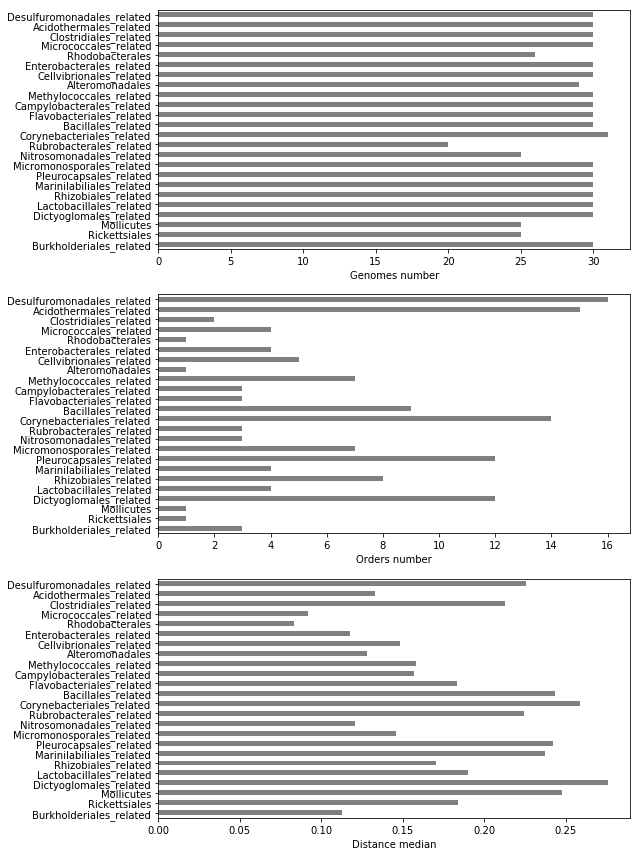

In [41]:
y_label = "Basic taxons number"

fig = plt.figure(figsize=(9, 12))

ax1 = ax1 = fig.add_subplot(311)
ax1 = btax_stats_df["n_genomes"].plot.barh(color="grey")
ax1.set_xlabel("Genomes number")

ax2 = fig.add_subplot(312)
ax2 = btax_stats_df["n_orders"].plot.barh(color="grey")
ax2.set_xlabel("Orders number")

ax3 = fig.add_subplot(313)
ax3 = btax_stats_df["median_dist"].plot.barh(color="grey")
ax3.set_xlabel("Distance median")

fig.tight_layout()

In [48]:
"abc" in "aabcd"

True